In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.display.max_columns = None

In [69]:
from empleados_package.visualizacion import PROJECT_ROOT_DIR, IMAGES_PATH, save_fig
from empleados_package.visualizacion import mapa_calor, histograma, categoricos, boxplot

# ANÁLISIS EXPLORATORIO Y LIMPIEZA

Comenzaremos transformado el csv en dataframe para analizarlo y proceder a su limpieza.

La limpieza estará orientada a la visualización de los datos, de modo que nos centraremos en que los datos sean del tipo correcto, que los strings tengan una tipografía y una nomenclatura unificadas, y eliminaremos las columnas que contenga datos irrelevantes o tan pocos datos que su contenido no nos aporte información útil. Se tratarán los dupicados, pero no se tocarán los nulos por ahora (excepto en el apartado de salarios), dado que el objetivo en este primer paso no es aplicar algoritmos de machine learning.

Como resultado de esta limpieza obtendremos tres ficheros .csv:
* **empleados_limpio.csv** será el resultado de la limpieza y con él se montará la base de datos.

* **empleados_tristes.csv** y **empleados_felices.csv** contendrá respectivamente la información de los empleados satisfechos e insatisfechos, y serán los ficheros que se usarán en la visualización para, por comparación, entender las causas de abandono de la empresa y aconsejar una estrategia que evite o al menos disminuya la fuga de talento.

In [70]:
df = pd.read_csv("./data/empleados.csv", index_col = 0)

Comenzaremos echando un vistazoa  nuestros datos

In [71]:
df.head(10)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,employeecount,employeenumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NUMCOMPANIESWORKED,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TOTALWORKINGYEARS,TrainingTimesLastYear,WORKLIFEBALANCE,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YEARSWITHCURRMANAGER,SameAsMonthlyIncome,DateBirth,Salary,RoleDepartament,NUMBERCHILDREN,RemoteWork
0,51,No,NaN,"684,0$",NaN,6,3,NaN,1,"162,0",1,0,51,3,5,resEArch DIREcToR,3,NaN,"19537,0",6462,7,Y,No,13,"3,0",3,NaN,0,NaN,5,"3,0",20,NaN,15,15,"19537,0",1972,1000000000$,NaN,NaN,Yes
1,52,No,NaN,"699,0$",NaN,1,4,Life Sciences,1,"259,0",3,0,65,2,5,ManAGeR,3,NaN,"19999,0",5678,0,NaN,NaN,14,"3,0",1,NaN,1,"34,0",5,"3,0",33,NaN,11,9,"19999,0",1971,1000000000$,NaN,NaN,1
2,42,No,travel_rarely,"532,0$",Research & Development,4,2,Technical Degree,1,"319,0",3,0,58,3,5,ManaGER,4,Married,"19232,0",4933,1,NaN,No,11,"3,0",4,NaN,0,"22,0",3,NaN,22,NaN,11,15,"19232,0",1981,1000000000$,ManaGER - Research & Development,NaN,1
3,47,No,travel_rarely,"359,0$",NaN,2,4,Medical,1,NaN,1,1,82,3,4,ReseArCH DIrECtOr,3,Married,"17169,0",26703,3,Y,NaN,19,"3,0",2,NaN,2,NaN,2,NaN,20,NaN,5,6,"17169,0",1976,1000000000$,NaN,NaN,False
4,46,No,NaN,"1319,0$",NaN,3,3,Technical Degree,1,NaN,1,1,45,4,4,sAleS EXECUtIve,1,Divorced,NaN,7739,2,Y,No,12,"3,0",4,NaN,1,NaN,5,"3,0",19,NaN,2,8,NaN,1977,1000000000$,NaN,NaN,0
5,48,No,NaN,"117,0$",Research & Development,22,3,Medical,1,"1900,0",4,1,58,3,4,MANAger,4,NaN,"17174,0",2437,3,NaN,No,11,"3,0",2,NaN,1,NaN,3,"3,0",22,NaN,4,7,"17174,0",1975,1000000000$,MANAger - Research & Development,NaN,Yes
6,59,No,NaN,"1435,0$",NaN,25,3,Life Sciences,1,"81,0",1,1,99,3,3,Sales ExeCutIVe,1,NaN,NaN,2354,7,Y,NaN,11,"3,0",4,NaN,0,"28,0",3,"2,0",21,NaN,7,9,NaN,1964,1000000000$,NaN,NaN,True
7,42,No,travel_rarely,"635,0$",NaN,1,1,NaN,1,"387,0",2,0,99,3,2,Sales eXEcUTiVe,3,Married,NaN,24532,1,NaN,No,25,"4,0",3,NaN,0,"20,0",3,"3,0",20,NaN,11,6,NaN,1981,1000000000$,NaN,NaN,0
8,41,No,NaN,"1276,0$",NaN,2,5,NaN,1,NaN,2,1,91,3,4,mANAGEr,1,Married,"16595,0",5626,7,NaN,No,16,"3,0",2,NaN,1,"22,0",2,"3,0",18,NaN,11,8,"16595,0",1982,1000000000$,NaN,NaN,True
9,41,No,travel_frequently,"840,0$",NaN,9,3,NaN,1,"999,0",1,0,64,3,5,reSEaRCH DIrectoR,3,NaN,NaN,3735,2,NaN,No,17,"3,0",2,NaN,1,"21,0",2,"4,0",18,NaN,0,11,NaN,1982,1000000000$,NaN,NaN,0


In [72]:
df.shape

(1614, 41)

In [73]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'employeecount',
       'employeenumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NUMCOMPANIESWORKED',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TOTALWORKINGYEARS', 'TrainingTimesLastYear', 'WORKLIFEBALANCE',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YEARSWITHCURRMANAGER', 'SameAsMonthlyIncome', 'DateBirth', 'Salary',
       'RoleDepartament', 'NUMBERCHILDREN', 'RemoteWork'],
      dtype='object')

Vamos a cambiar el nombre de las columnas a snake_case y en mayúsculas.

In [74]:
columns_snake = ['Age', 'Attrition', 'Business_travel', 'Daily_rate', 'Department',
       'Distance_from_home', 'Education', 'Education_field', 'Employee_count',
       'Employee_number', 'Environment_Satisfaction', 'Gender', 'Hourly_Rate',
       'Job_Involvement', 'Job_Level', 'Job_Role', 'Job_Satisfaction',
       'Marital_Status', 'Monthly_Income', 'Monthly_Rate', 'NUM_COMPANIES_WORKED',
       'Over_18', 'Over_Time', 'Percent_Salary_Hike', 'Performance_Rating',
       'Relationship_Satisfaction', 'Standard_Hours', 'Stock_Option_Level',
       'TOTAL_WORKING_YEARS', 'Training_Times_Last_Year', 'WORK_LIFE_BALANCE',
       'Years_At_Company', 'Years_In_Current_Role', 'Years_Since_Last_Promotion',
       'YEARS_WITH_CURR_MANAGER', 'Same_As_Monthly_Income', 'Date_Birth', 'Salary',
       'Role_Departament', 'NUMBER_CHILDREN', 'Remote_Work']

In [75]:
columns_upper = [i.upper() for i in columns_snake]

In [76]:
df.columns = columns_upper

In [77]:
df.head()

,AGE,ATTRITION,BUSINESS_TRAVEL,DAILY_RATE,DEPARTMENT,DISTANCE_FROM_HOME,EDUCATION,EDUCATION_FIELD,EMPLOYEE_COUNT,EMPLOYEE_NUMBER,ENVIRONMENT_SATISFACTION,GENDER,HOURLY_RATE,JOB_INVOLVEMENT,JOB_LEVEL,JOB_ROLE,JOB_SATISFACTION,MARITAL_STATUS,MONTHLY_INCOME,MONTHLY_RATE,NUM_COMPANIES_WORKED,OVER_18,OVER_TIME,PERCENT_SALARY_HIKE,PERFORMANCE_RATING,RELATIONSHIP_SATISFACTION,STANDARD_HOURS,STOCK_OPTION_LEVEL,TOTAL_WORKING_YEARS,TRAINING_TIMES_LAST_YEAR,WORK_LIFE_BALANCE,YEARS_AT_COMPANY,YEARS_IN_CURRENT_ROLE,YEARS_SINCE_LAST_PROMOTION,YEARS_WITH_CURR_MANAGER,SAME_AS_MONTHLY_INCOME,DATE_BIRTH,SALARY,ROLE_DEPARTAMENT,NUMBER_CHILDREN,REMOTE_WORK
0,51,No,NaN,"684,0$",NaN,6,3,NaN,1,"162,0",1,0,51,3,5,resEArch DIREcToR,3,NaN,"19537,0",6462,7,Y,No,13,"3,0",3,NaN,0,NaN,5,"3,0",20,NaN,15,15,"19537,0",1972,1000000000$,NaN,NaN,Yes
1,52,No,NaN,"699,0$",NaN,1,4,Life Sciences,1,"259,0",3,0,65,2,5,ManAGeR,3,NaN,"19999,0",5678,0,NaN,NaN,14,"3,0",1,NaN,1,"34,0",5,"3,0",33,NaN,11,9,"19999,0",1971,1000000000$,NaN,NaN,1
2,42,No,travel_rarely,"532,0$",Research & Development,4,2,Technical Degree,1,"319,0",3,0,58,3,5,ManaGER,4,Married,"19232,0",4933,1,NaN,No,11,"3,0",4,NaN,0,"22,0",3,NaN,22,NaN,11,15,"19232,0",1981,1000000000$,ManaGER - Research & Development,NaN,1
3,47,No,travel_rarely,"359,0$",NaN,2,4,Medical,1,NaN,1,1,82,3,4,ReseArCH DIrECtOr,3,Married,"17169,0",26703,3,Y,NaN,19,"3,0",2,NaN,2,NaN,2,NaN,20,NaN,5,6,"17169,0",1976,1000000000$,NaN,NaN,False
4,46,No,NaN,"1319,0$",NaN,3,3,Technical Degree,1,NaN,1,1,45,4,4,sAleS EXECUtIve,1,Divorced,NaN,7739,2,Y,No,12,"3,0",4,NaN,1,NaN,5,"3,0",19,NaN,2,8,NaN,1977,1000000000$,NaN,NaN,0


In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1614 entries, 0 to 1613
Data columns (total 41 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   AGE                         1614 non-null   object 
 1   ATTRITION                   1614 non-null   object 
 2   BUSINESS_TRAVEL             842 non-null    object 
 3   DAILY_RATE                  1614 non-null   object 
 4   DEPARTMENT                  302 non-null    object 
 5   DISTANCE_FROM_HOME          1614 non-null   int64  
 6   EDUCATION                   1614 non-null   int64  
 7   EDUCATION_FIELD             869 non-null    object 
 8   EMPLOYEE_COUNT              1614 non-null   int64  
 9   EMPLOYEE_NUMBER             1183 non-null   object 
 10  ENVIRONMENT_SATISFACTION    1614 non-null   int64  
 11  GENDER                      1614 non-null   int64  
 12  HOURLY_RATE                 1614 non-null   object 
 13  JOB_INVOLVEMENT             1614 non-n

## Columnas numéricas

Parece haber bastantes columnas con el tipo de dato erroneo, por ejemplo 'AGE' debería de ser un entero. También 'DAILY_RATE' y ', 'SALARY', que además tiene un símbolo de dolar que tendremos que eliminar.

Vamos a comprobar los valores únicos de estas columnas y a solucionar este problema de tipos de dato. También a eliminar las columnas 'SAME_AS_MONTHLY_INCOME', que es redundante, y 'EMPLOYEE_NUMBER', que contiene nulos y no nos es útil.

In [79]:
df_types = df.drop(['SAME_AS_MONTHLY_INCOME', 'EMPLOYEE_NUMBER'], axis=1)

In [80]:
integer = ['AGE', 'HOURLY_RATE', 'STANDARD_HOURS', 'TOTAL_WORKING_YEARS', 'WORK_LIFE_BALANCE', 'YEARS_IN_CURRENT_ROLE', 'NUMBER_CHILDREN']
float = ['MONTHLY_INCOME', 'PERFORMANCE_RATING']
dollar = ['DAILY_RATE', 'SALARY']

In [81]:
print('\n'.join(f"{i} {df_types[i].unique()}" for i in integer))

AGE ['51' '52' '42' '47' '46' '48' '59' '41' '56' '38' '55' '40' '58' '35'
 '45' '33' '36' '34' 'forty-seven' '53' '43' '60' '32' '37' '49' '39' '50'
 '44' '30' 'fifty-eight' '29' '31' '54' '57' '27' 'thirty-six' '28' '26'
 'fifty-five' '25' 'fifty-two' 'thirty-one' '24' 'thirty' '23' '22' '21'
 '20' 'twenty-six' '19' 'thirty-seven' '18' 'thirty-two' 'twenty-four']
HOURLY_RATE ['51' '65' '58' '82' '45' '99' '91' '64' '55' '68' '49' '61' '79' '31'
 '69' '48' '80' '74' '98' '59' '33' '56' '66' '57' '53' '87' '81' '84'
 '32' '41' '92' '47' 'Not Available' '43' '86' '30' '42' '88' '96' '67'
 '62' '72' '78' '89' '52' '50' '90' '37' '94' '76' '60' '46' '83' '100'
 '40' '97' '54' '75' '39' '85' '63' '44' '93' '36' '35' '73' '71' '70'
 '38' '77' '95' '34']
STANDARD_HOURS [nan '80,0']
TOTAL_WORKING_YEARS [nan '34,0' '22,0' '28,0' '20,0' '21,0' '33,0' '40,0' '18,0' '25,0' '15,0'
 '17,0' '26,0' '16,0' '24,0' '14,0' '23,0' '27,0' '19,0' '11,0' '38,0'
 '37,0' '13,0' '12,0' '29,0' '10,0' '36,0' '35,

In [82]:
print('\n'.join(f"{i} {df_types[i].unique()}" for i in float))

MONTHLY_INCOME ['19537,0' '19999,0' '19232,0' '17169,0' nan '17174,0' '16595,0' '19973,0'
 '13402,0' '13206,0' '19545,0' '18041,0' '19246,0' '10748,0' '16752,0'
 '6201,0' '19845,0' '4001,0' '10447,0' '16064,0' '3210,0' '10266,0'
 '10475,0' '6162,0' '4721,0' '4615,0' '16959,0' '10306,0' '5406,0'
 '5902,0' '10855,0' '5914,0' '6646,0' '13973,0' '13320,0' '6687,0'
 '4735,0' '13872,0' '19045,0' '16015,0' '9613,0' '11510,0' '4306,0'
 '17046,0' '5067,0' '3692,0' '19847,0' '2308,0' '5747,0' '10422,0'
 '6347,0' '2348,0' '3072,0' '12490,0' '8020,0' '17068,0' '8943,0'
 '19272,0' '5577,0' '2691,0' '7403,0' '8823,0' '3579,0' '17779,0'
 '18213,0' '13577,0' '19190,0' '17123,0' '19187,0' '10008,0' '7988,0'
 '7083,0' '4723,0' '3407,0' '2929,0' '12031,0' '15427,0' '5126,0' '9619,0'
 '5010,0' '19033,0' '10400,0' '2793,0' '5674,0' '19197,0' '8412,0'
 '3348,0' '5309,0' '7654,0' '12808,0' '6586,0' '2519,0' '17099,0'
 '13120,0' '3131,0' '4444,0' '6674,0' '9852,0' '17861,0' '7446,0'
 '13757,0' '16598,0' '4285

In [83]:
print('\n'.join(f"{i} {df_types[i].unique()}" for i in dollar))

DAILY_RATE ['684,0$' '699,0$' '532,0$' '359,0$' '1319,0$' '117,0$' '1435,0$' '635,0$'
 '1276,0$' '840,0$' '247,0$' '1369,0$' '201,0$' '1360,0$' '692,0$'
 '1398,0$' '286,0$' '1402,0$' '819,0$' '884,0$' '1238,0$' '515,0$'
 '1223,0$' '202,0$' '928,0$' '607,0$' '266,0$' '429,0$' '589,0$' 'nan$'
 '1180,0$' '1282,0$' '776,0$' '665,0$' '526,0$' '1034,0$' '1403,0$'
 '1499,0$' '580,0$' '859,0$' '263,0$' '1376,0$' '885,0$' '1003,0$'
 '1321,0$' '394,0$' '1372,0$' '1333,0$' '228,0$' '737,0$' '823,0$'
 '667,0$' '301,0$' '573,0$' '1329,0$' '630,0$' '1063,0$' '1017,0$'
 '1296,0$' '939,0$' '1355,0$' '1448,0$' '200,0$' '1202,0$' '404,0$'
 '208,0$' '813,0$' '465,0$' '1189,0$' '1001,0$' '1394,0$' '161,0$'
 '288,0$' '682,0$' '1354,0$' '147,0$' '119,0$' '1413,0$' '452,0$' '334,0$'
 '1132,0$' '982,0$' '480,0$' '1099,0$' '672,0$' '1379,0$' '583,0$'
 '1492,0$' '1050,0$' '469,0$' '237,0$' '1440,0$' '1291,0$' '1157,0$'
 '1336,0$' '1224,0$' '735,0$' '1389,0$' '638,0$' '1240,0$' '194,0$'
 '1339,0$' '111,0$' '1469

Tras comprobar los valores únicos constatamos que:

* La columna AGE tiene cifras escritas con letras que debemos cambiar antes de transformar el tipo de dato.

* La columna STANDARD_HOURS contiene el valor 80,0 o nan para todos los registros por lo que es inútil a efectos de análsis y ml, de modo que puede ser eliminada.

* La columna SALARY contiene el mismo valor para todos los registros y es inútil a efectos de análsis y ml, de modo que puede ser eliminada.

* Todos los valores de la columna NUMBER_CHILDREN son nulos y puede ser eliminada.

* Las columnas 'MONTHLY_INCOME' y 'PERFORMANCE_RATING' tienen coma para indicar los decimales, habrá que sustituir la coma por punto.

* La columna 'DAILY_RATE', además de tener coma para indicar los decimales que habrá  que sustituir por punto, tiene al final del string el símbolo $; eliminaremos también el dollar.

* Sustituiremos los 'Not Available' de 'HOURLY_RATE' por NaN.

In [84]:
# Eliminamos columnas
df_types = df_types.drop(['STANDARD_HOURS', 'SALARY', 'NUMBER_CHILDREN'], axis=1)

In [85]:
# Sacamos los valores escritos con letras de AGE

letras = [i for i in df['AGE'] if len(i)>2]
letras

['forty-seven',
 'fifty-eight',
 'thirty-six',
 'fifty-five',
 'fifty-two',
 'thirty-one',
 'thirty',
 'twenty-six',
 'thirty-seven',
 'thirty-two',
 'twenty-four',
 'thirty-two']

In [86]:
# Creamos un diccionario con los valores a sustituir

dict_num = {'forty-seven': '47',
 'fifty-eight': '58',
 'thirty-six': '36',
 'fifty-five': '55',
 'fifty-two': '52',
 'thirty-one': '31',
 'thirty': '30',
 'twenty-six': '26',
 'thirty-seven': '37',
 'thirty-two': '32',
 'twenty-four': '24'}

In [87]:
# Aplicamos map al diccionario que acabamos de crear

df_types['AGE'] = df_types['AGE'].replace(dict_num)

In [88]:
# Comprobamos que la transformación se realizó con éxito
df_types['AGE'].unique()

array(['51', '52', '42', '47', '46', '48', '59', '41', '56', '38', '55',
       '40', '58', '35', '45', '33', '36', '34', '53', '43', '60', '32',
       '37', '49', '39', '50', '44', '30', '29', '31', '54', '57', '27',
       '28', '26', '25', '24', '23', '22', '21', '20', '19', '18'],
      dtype=object)

Ahora vamos a sustituir las comas por punto y cambiar el dato a entero

In [89]:
num_coma = ['TOTAL_WORKING_YEARS', 'WORK_LIFE_BALANCE', 'YEARS_IN_CURRENT_ROLE', 'MONTHLY_INCOME', 'PERFORMANCE_RATING']

In [90]:
for column_name in num_coma:
    
    print(f"Procesando columna: {column_name}")
    df_types[column_name] = pd.to_numeric(df_types[column_name].str.replace(',', '.'), errors='coerce')


Procesando columna: TOTAL_WORKING_YEARS
Procesando columna: WORK_LIFE_BALANCE
Procesando columna: YEARS_IN_CURRENT_ROLE
Procesando columna: MONTHLY_INCOME
Procesando columna: PERFORMANCE_RATING


Pasamos 'AGE' y 'HOURLY_RATE'  a entero, sustituyendo los 'Not Available' de 'HOURLY_RATE' por NaN

In [91]:
df_types[['AGE', 'HOURLY_RATE']] = df_types[['AGE', 'HOURLY_RATE']].replace('Not Available', np.nan).apply(pd.to_numeric).astype('Int64')

Tan solo falta cambiar 'DAILY_RATE', que además de la coma tiene el símbolo del dollar

In [92]:
df_types['DAILY_RATE'] = df_types['DAILY_RATE'].apply(lambda x: str(x).replace('$', ''))

In [93]:
#df_types['DAILY_RATE'] = df_types['DAILY_RATE'].replace('nan', np.nan).apply(lambda x: int(str(x).replace(',', '.')) if pd.notna(x) else x)
df_types['DAILY_RATE'] = pd.to_numeric(df_types['DAILY_RATE'].str.replace(',', '.'), errors='coerce')

Siguiendo con el estudio de los datos vemos que hay otras cinco columnas que pueden ser eliminadas:

* 'OVER_18' tiene nulos y su información puede ser obtenida de la columna 'AGE', que ahora que ya está con sus datos en enteros, podemos comprobar que todos los empleados son mayores de edad, ya que su valor mínimo es 18.

* Las columnas 'DEPARTMENT', 'ROLE_DEPARTAMENT' y 'YEARS_IN_CURRENT_ROLE' tienen tal cantidad de nulos, que no merece la pena mantenerlas.

* 'EMPLOYEE_COUNT' contiene el valor 1 para todas las filas.

In [94]:
# Comprobamos la edad mínima de los empleados
print(df_types['AGE'].min())

18


In [95]:
# Eliminamos la columnas indeseadas
df_types = df_types.drop(['DEPARTMENT', 'ROLE_DEPARTAMENT', 'YEARS_IN_CURRENT_ROLE', 'OVER_18', 'EMPLOYEE_COUNT'], axis=1)

In [96]:
#Comprobamos que los datos han cambiado correctamente
df_types.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1614 entries, 0 to 1613
Data columns (total 31 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   AGE                         1614 non-null   Int64  
 1   ATTRITION                   1614 non-null   object 
 2   BUSINESS_TRAVEL             842 non-null    object 
 3   DAILY_RATE                  1490 non-null   float64
 4   DISTANCE_FROM_HOME          1614 non-null   int64  
 5   EDUCATION                   1614 non-null   int64  
 6   EDUCATION_FIELD             869 non-null    object 
 7   ENVIRONMENT_SATISFACTION    1614 non-null   int64  
 8   GENDER                      1614 non-null   int64  
 9   HOURLY_RATE                 1530 non-null   Int64  
 10  JOB_INVOLVEMENT             1614 non-null   int64  
 11  JOB_LEVEL                   1614 non-null   int64  
 12  JOB_ROLE                    1614 non-null   object 
 13  JOB_SATISFACTION            1614 non-n

Vamos a ver una descripción de los datos numéricos

In [97]:
df_types.describe().T

,count,mean,std,min,25%,50%,75%,max
AGE,1614.0,36.920694,9.102157,18.0,30.0,36.0,43.0,60.0
DAILY_RATE,1490.0,802.085235,403.246954,103.0,468.25,798.0,1157.0,1499.0
DISTANCE_FROM_HOME,1614.0,4.527261,14.591913,-49.0,2.0,5.0,11.0,29.0
EDUCATION,1614.0,2.925031,1.022357,1.0,2.0,3.0,4.0,5.0
ENVIRONMENT_SATISFACTION,1614.0,4.294919,6.993559,1.0,2.0,3.0,4.0,49.0
GENDER,1614.0,0.398389,0.489718,0.0,0.0,0.0,1.0,1.0
HOURLY_RATE,1530.0,66.028105,20.185954,30.0,48.0,66.0,84.0,100.0
JOB_INVOLVEMENT,1614.0,2.739777,0.711567,1.0,2.0,3.0,3.0,4.0
JOB_LEVEL,1614.0,2.068154,1.101344,1.0,1.0,2.0,3.0,5.0
JOB_SATISFACTION,1614.0,2.738538,1.106163,1.0,2.0,3.0,4.0,4.0


Podemos constatar que la columna 'DISTANCE_FROM_HOME' tiene valores negativos, lo cual no tiene mucho sentido, de modo que vamos a tomar el valor absoluto de sus cifras

In [98]:
df_types['DISTANCE_FROM_HOME'] = df_types['DISTANCE_FROM_HOME'].abs()

## Salario
Hay varias columnas que se refieren al salario percibido y merecen una atención especial, tanto por el gran impacto que esta cifra tiene sobre la satisfacción de los empleados, como para dirimir si todas son necesarias o nos aportan datos redundantes.

In [99]:
df_salario = df_types[['HOURLY_RATE', 'DAILY_RATE', 'MONTHLY_RATE', 'MONTHLY_INCOME']]

In [100]:
df_salario.head()

,HOURLY_RATE,DAILY_RATE,MONTHLY_RATE,MONTHLY_INCOME
0,51,684.0,6462,19537.0
1,65,699.0,5678,19999.0
2,58,532.0,4933,19232.0
3,82,359.0,26703,17169.0
4,45,1319.0,7739,NaN


Las columnas 'HOURLY_RATE', 'DAILY_RATE' y 'MONTHLY_RATE' están relacionadas entre sí y podemos prescindir de dos, nos vamos a quedar con el sueldo mensual 'MONTHLY_RATE':

* DAILY_RATE = HOURLY_RATE * Average_hours_per_day

* MONTHLY_RATE = DAILY_RATE * Average_working_days_per_month

Con 'MONTHLY_INCOME' la cosa cambia, porque es la suma del salario mas otras fuentes de ingresos y beneficios, como comisiones de venta, de ahí que ambos valores puedan llegar a diferir de manera notable. Además tiene el problema de que tiene una cantidad importante de nulos, pero antes de hacer nada con ella, vamos a ver cómo se relacione con el resto de variables.

In [101]:
# Eliminamos las columnas 'HOURLY_RATE' y 'DAILY_RATE'
df_types = df_types.drop(['HOURLY_RATE', 'DAILY_RATE'], axis=1)

Saving figure corr_heatmap_1


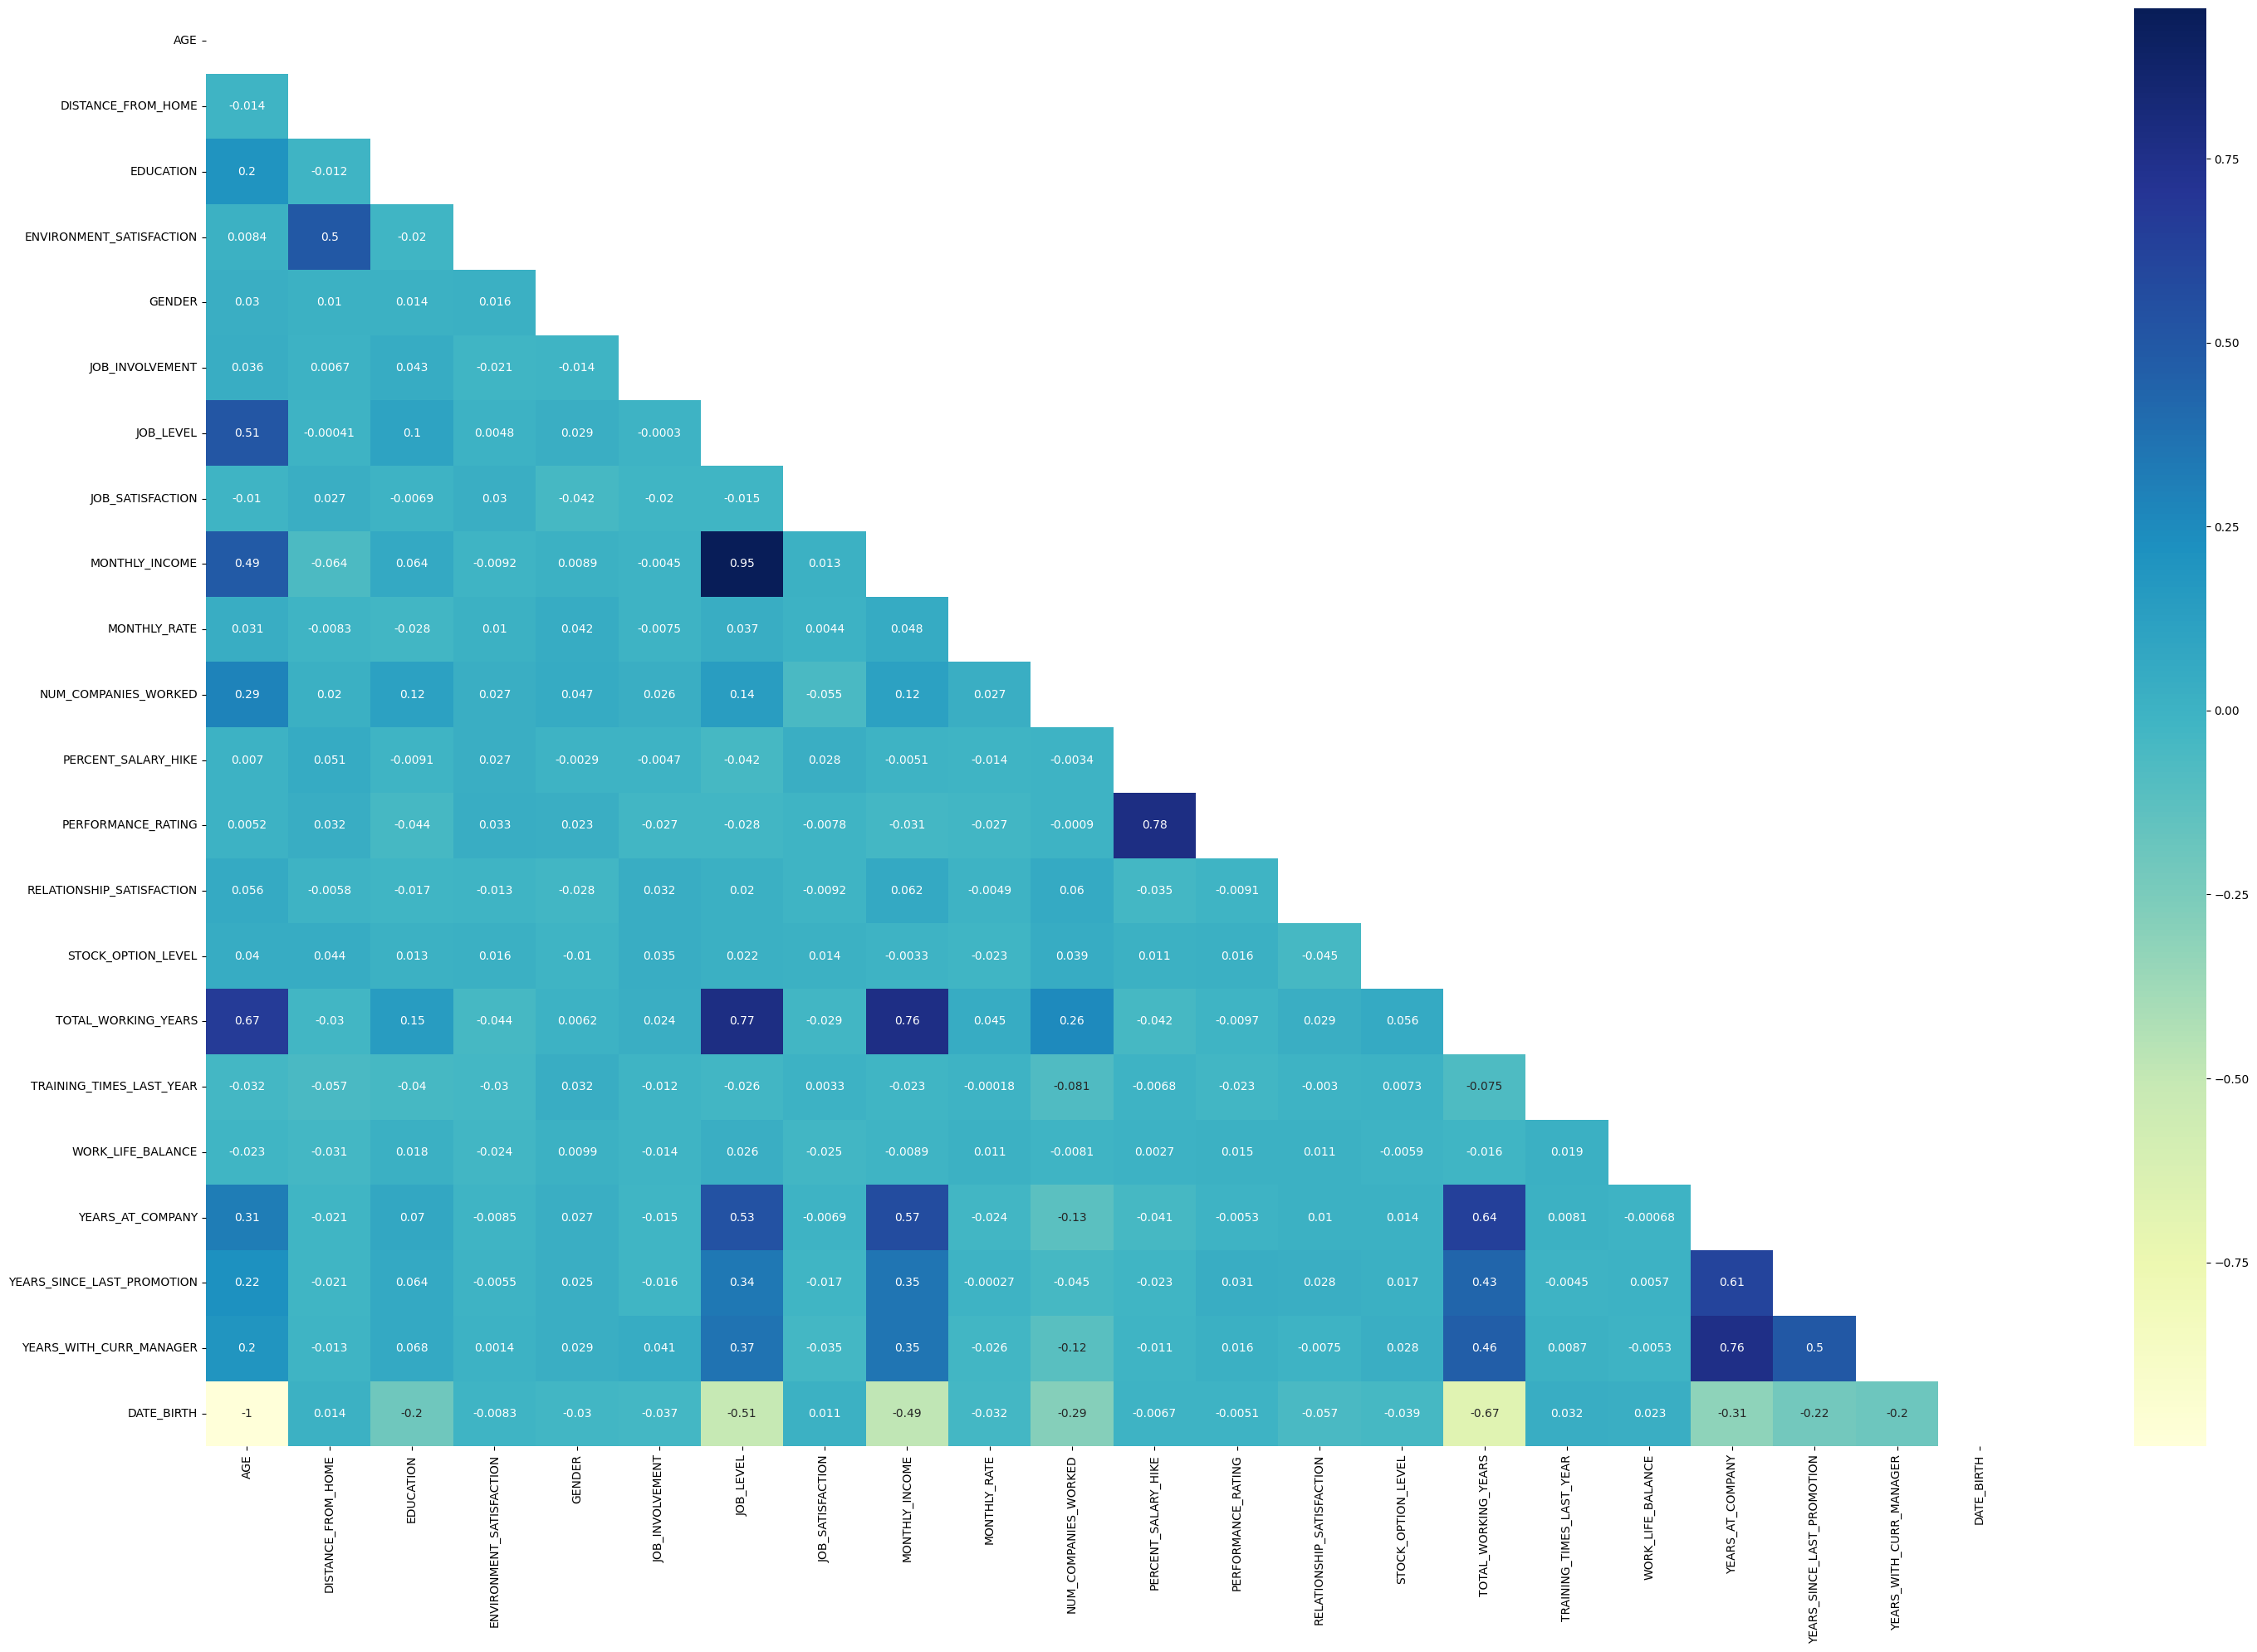

In [102]:
mapa_calor(df_types, nombre_fichero="corr_heatmap_1")

En este gráfico se observa una fuerte correlación entre 'MONTHLY_INCOME' y 'JOB_LEVEL', de modo que a lo mejor podemos aprovechar el segundo, que no tiene nulos, para completar los datos del primero

In [103]:
df_level_income = df_types[['JOB_LEVEL', 'MONTHLY_INCOME']]

In [104]:
df_level_income.head()

,JOB_LEVEL,MONTHLY_INCOME
0,5,19537.0
1,5,19999.0
2,5,19232.0
3,4,17169.0
4,4,NaN


In [105]:
df_level_income_grouped = df_level_income.groupby('JOB_LEVEL').agg(['mean', 'median', 'count'])

In [106]:
df_level_income_grouped.head()

MONTHLY_INCOME               
                    mean   median count
JOB_LEVEL                              
1            2811.113402   2683.0   291
2            5391.410714   5304.0   280
3           10007.184466  10124.0   103
4           15340.706897  16015.0    58
5           19132.461538  19197.0    39

Aunque en la mayoría de los casos la media no difiere demasiado de la quizá sea más prudente usar la mediana, dado que un trabajador concreto con un sueldo extraordinariamente alto o bajo para su categoría, puede desviarnos toda la estadística. Vamos a asegurarnos comprobando los outliers.

Saving figure boxplot_job_level


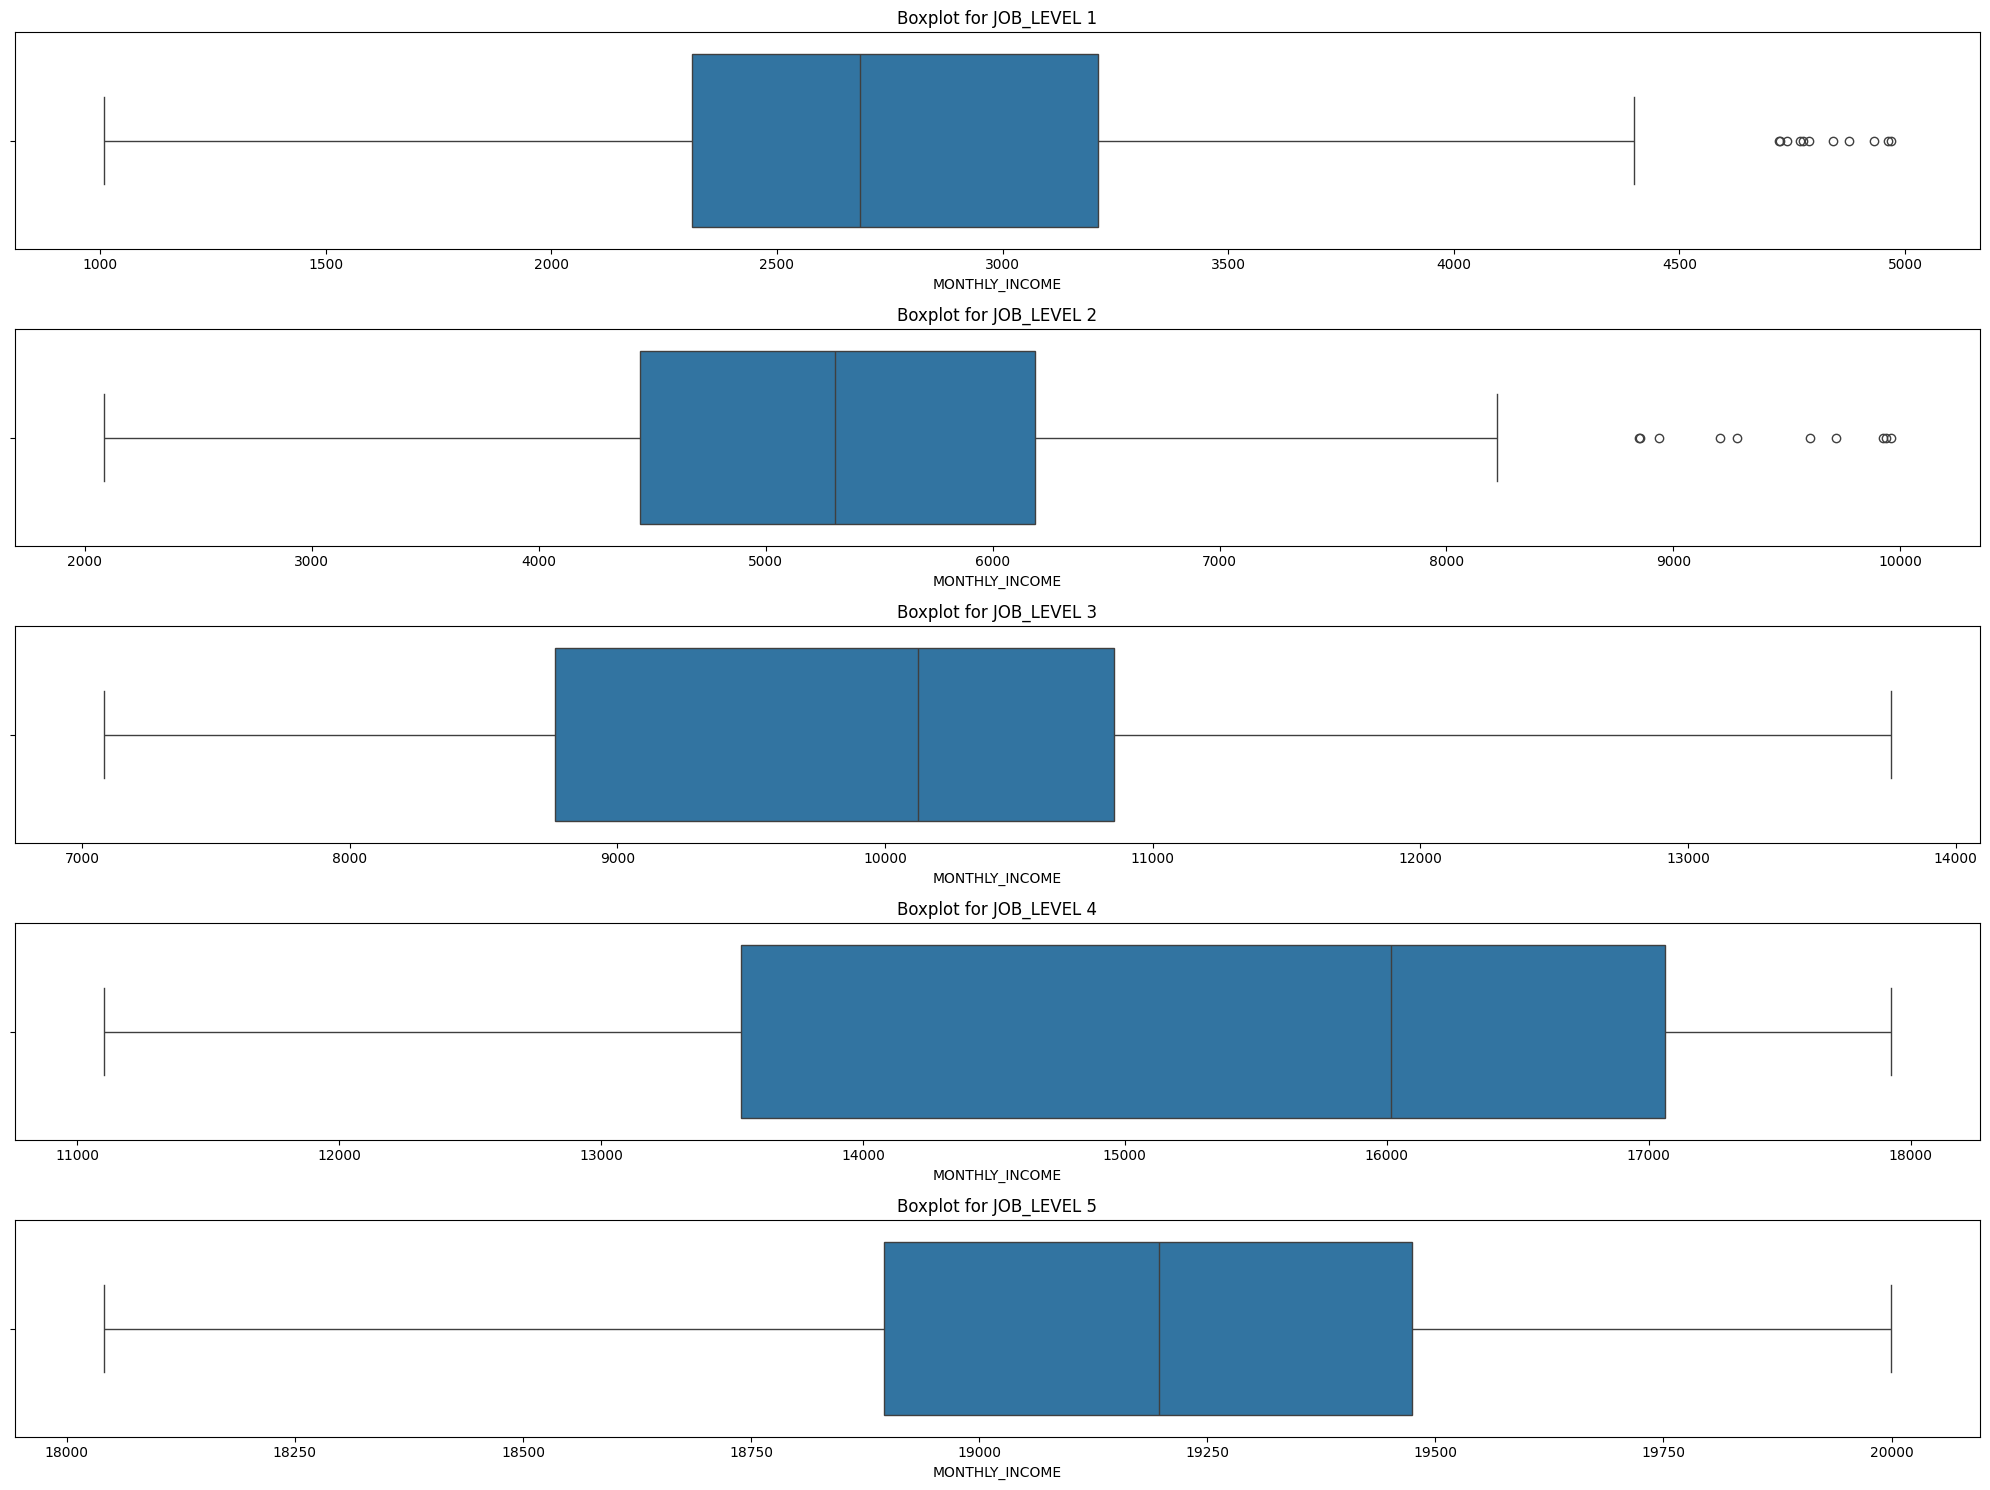

In [107]:
# Separamos el data frame por 'JOB_LEVEL'
df_level_income_1 = df_level_income[df_level_income['JOB_LEVEL'] == 1]
df_level_income_2 = df_level_income[df_level_income['JOB_LEVEL'] == 2]
df_level_income_3 = df_level_income[df_level_income['JOB_LEVEL'] == 3]
df_level_income_4 = df_level_income[df_level_income['JOB_LEVEL'] == 4]
df_level_income_5 = df_level_income[df_level_income['JOB_LEVEL'] == 5]

list_level_income = [df_level_income_1, df_level_income_2, df_level_income_3, df_level_income_4, df_level_income_5]

# Creamos el subplot con 5 filas y una columna
fig, axes = plt.subplots(5, 1, figsize=(20, 15))

for i, df_level_income_i in enumerate(list_level_income):
    sns.boxplot(x=df_level_income_i.columns[1], data=df_level_income_i, ax=axes[i])
    axes[i].set_title(f'Boxplot for JOB_LEVEL {i + 1}')

plt.tight_layout()
save_fig("boxplot_job_level")
plt.show()

En los boxplots anteriores observamos que no hay outliers para los JOB_LEVEL 3, 4 y 5, pero en cambio sí son relevantes para los JOB_LEVEL 1 y 2. 

En consecuencia crearemos una nueva columna llamada SALARY_LEVEL en este data frame temporal, que contenga la media redondeada para los JOB_LEVEL 3, 4 y 5, y la mediana para los JOB_LEVEL 1 y 2. Estos valores se utilizarán para sustituir los nulos de la columna JOB_LEVEL en el data frame principal.

In [108]:
df_level_income_grouped.T.columns

Index([1, 2, 3, 4, 5], dtype='int64', name='JOB_LEVEL')

In [109]:
df_level_income_grouped['SALARY_LEVEL'] = [df_level_income_grouped.iloc[0, 1] if i == 1 else (df_level_income_grouped.iloc[1, 1] if i == 2 else (round(df_level_income_grouped.iloc[2, 0]) if i == 3 else (round(df_level_income_grouped.iloc[3, 0]) if i ==4 else round(df_level_income_grouped.iloc[4, 0])))) for i in df_level_income_grouped.T.columns]

In [110]:
df_level_income_grouped.head()

MONTHLY_INCOME                SALARY_LEVEL
                    mean   median count             
JOB_LEVEL                                           
1            2811.113402   2683.0   291       2683.0
2            5391.410714   5304.0   280       5304.0
3           10007.184466  10124.0   103      10007.0
4           15340.706897  16015.0    58      15341.0
5           19132.461538  19197.0    39      19132.0

In [111]:
df_level_income_grouped.iloc[1, 3]

5304.0

In [112]:
for i in range(1,6):

    condicion = (df_types['JOB_LEVEL'] == i) & (pd.isna(df_types['MONTHLY_INCOME']))

    df_types.loc[condicion, 'MONTHLY_INCOME'] = df_level_income_grouped.iloc[(i-1), 3]

In [113]:
df_types.head()

,AGE,ATTRITION,BUSINESS_TRAVEL,DISTANCE_FROM_HOME,EDUCATION,EDUCATION_FIELD,ENVIRONMENT_SATISFACTION,GENDER,JOB_INVOLVEMENT,JOB_LEVEL,JOB_ROLE,JOB_SATISFACTION,MARITAL_STATUS,MONTHLY_INCOME,MONTHLY_RATE,NUM_COMPANIES_WORKED,OVER_TIME,PERCENT_SALARY_HIKE,PERFORMANCE_RATING,RELATIONSHIP_SATISFACTION,STOCK_OPTION_LEVEL,TOTAL_WORKING_YEARS,TRAINING_TIMES_LAST_YEAR,WORK_LIFE_BALANCE,YEARS_AT_COMPANY,YEARS_SINCE_LAST_PROMOTION,YEARS_WITH_CURR_MANAGER,DATE_BIRTH,REMOTE_WORK
0,51,No,NaN,6,3,NaN,1,0,3,5,resEArch DIREcToR,3,NaN,19537.0,6462,7,No,13,3.0,3,0,NaN,5,3.0,20,15,15,1972,Yes
1,52,No,NaN,1,4,Life Sciences,3,0,2,5,ManAGeR,3,NaN,19999.0,5678,0,NaN,14,3.0,1,1,34.0,5,3.0,33,11,9,1971,1
2,42,No,travel_rarely,4,2,Technical Degree,3,0,3,5,ManaGER,4,Married,19232.0,4933,1,No,11,3.0,4,0,22.0,3,NaN,22,11,15,1981,1
3,47,No,travel_rarely,2,4,Medical,1,1,3,4,ReseArCH DIrECtOr,3,Married,17169.0,26703,3,NaN,19,3.0,2,2,NaN,2,NaN,20,5,6,1976,False
4,46,No,NaN,3,3,Technical Degree,1,1,4,4,sAleS EXECUtIve,1,Divorced,15341.0,7739,2,No,12,3.0,4,1,NaN,5,3.0,19,2,8,1977,0


## Columnas no numéricas
Primero vamos a comprobar los valores únicos

In [114]:
for i in df_types.select_dtypes(exclude='number').columns:
    print(i, df_types[i].unique())

ATTRITION ['No' 'Yes']
BUSINESS_TRAVEL [nan 'travel_rarely' 'travel_frequently' 'non-travel']
EDUCATION_FIELD [nan 'Life Sciences' 'Technical Degree' 'Medical' 'Other' 'Marketing'
 'Human Resources']
JOB_ROLE [' resEArch DIREcToR ' ' ManAGeR ' ' ManaGER ' ... ' sAlES ExECUTivE '
 ' SaLes ExecUtIVe ' ' mAnUfactURInG DiRECTOr ']
MARITAL_STATUS [nan 'Married' 'Divorced' 'Single' 'divorced' 'Marreid']
OVER_TIME ['No' nan 'Yes']
REMOTE_WORK ['Yes' '1' 'False' '0' 'True']


De la ejecución anterior, podemos inferir la necesidad de realizar varias acciones:

* En 'EDUCATION_FIELD' se sustituirán los espacios por _ y se pondrá todo en minúsculas.

* En 'JOB_ROLE' se eliminarán los espacios del principio y el final, se sustituirán los espacios centrales por _ y se pondrá todo en minúsculas.

* En 'MARITAL_STATUS' se pondrá todo en minúsculas y se cambiará 'marreid' por 'married'.

* En 'REMOTE_WORK' se sustituirán 'False' y '0' por 'No', y '1' por 'Yes'.

In [115]:
# Realizamos los cambios propuestos en 'EDUCATION_FIELD'
df_types['EDUCATION_FIELD'] = df_types['EDUCATION_FIELD'].str.replace(' ', '_').str.lower()

In [116]:
# Realizamos los cambios propuestos en 'JOB_ROLE'
df_types['JOB_ROLE'] = df_types['JOB_ROLE'].str.strip().str.replace(' ', '_').str.lower()

In [117]:
# Realizamos los cambios propuestos en 'MARITAL_STATUS'
df_types['MARITAL_STATUS'] = df_types['MARITAL_STATUS'].str.replace('Marreid', 'Married').str.lower()

In [118]:
# Realizamos los cambios propuestos en 'REMOTE_WORK'
remote = {'False': 'No',
          '0': 'No',
          '1': 'yes',
          'True': 'yes'} 

df_types['REMOTE_WORK'] = df_types['REMOTE_WORK'].replace(remote).str.lower()


In [119]:
df_types['REMOTE_WORK'].unique()

array(['yes', 'no'], dtype=object)

Además de estos cambios, la columna 'GENDER' tiene valores numéricos. Sustituiremos los 0 por F (de female) y los 1 por M (de male).

In [120]:
condicion_1 = df_types['GENDER'] == 0
condicion_2 = df_types['GENDER'] == 1

df_types.loc[condicion_1, 'GENDER'] = 'F'
df_types.loc[condicion_2, 'GENDER'] = 'M'

/tmp/ipykernel_8127/1135355244.py:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'F' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_types.loc[condicion_1, 'GENDER'] = 'F'


Por último, vamos a comprobar si hay duplicados

In [121]:
df_types.duplicated().sum()

59

In [122]:
df_types.drop_duplicates(inplace=True)

In [123]:
df_types.duplicated().sum()

0

In [124]:
df_types.head()

,AGE,ATTRITION,BUSINESS_TRAVEL,DISTANCE_FROM_HOME,EDUCATION,EDUCATION_FIELD,ENVIRONMENT_SATISFACTION,GENDER,JOB_INVOLVEMENT,JOB_LEVEL,JOB_ROLE,JOB_SATISFACTION,MARITAL_STATUS,MONTHLY_INCOME,MONTHLY_RATE,NUM_COMPANIES_WORKED,OVER_TIME,PERCENT_SALARY_HIKE,PERFORMANCE_RATING,RELATIONSHIP_SATISFACTION,STOCK_OPTION_LEVEL,TOTAL_WORKING_YEARS,TRAINING_TIMES_LAST_YEAR,WORK_LIFE_BALANCE,YEARS_AT_COMPANY,YEARS_SINCE_LAST_PROMOTION,YEARS_WITH_CURR_MANAGER,DATE_BIRTH,REMOTE_WORK
0,51,No,NaN,6,3,NaN,1,F,3,5,research_director,3,NaN,19537.0,6462,7,No,13,3.0,3,0,NaN,5,3.0,20,15,15,1972,yes
1,52,No,NaN,1,4,life_sciences,3,F,2,5,manager,3,NaN,19999.0,5678,0,NaN,14,3.0,1,1,34.0,5,3.0,33,11,9,1971,yes
2,42,No,travel_rarely,4,2,technical_degree,3,F,3,5,manager,4,married,19232.0,4933,1,No,11,3.0,4,0,22.0,3,NaN,22,11,15,1981,yes
3,47,No,travel_rarely,2,4,medical,1,M,3,4,research_director,3,married,17169.0,26703,3,NaN,19,3.0,2,2,NaN,2,NaN,20,5,6,1976,no
4,46,No,NaN,3,3,technical_degree,1,M,4,4,sales_executive,1,divorced,15341.0,7739,2,No,12,3.0,4,1,NaN,5,3.0,19,2,8,1977,no


In [129]:
df_types.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1555 entries, 0 to 1611
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   AGE                         1555 non-null   Int64  
 1   ATTRITION                   1555 non-null   object 
 2   BUSINESS_TRAVEL             812 non-null    object 
 3   DISTANCE_FROM_HOME          1555 non-null   int64  
 4   EDUCATION                   1555 non-null   int64  
 5   EDUCATION_FIELD             831 non-null    object 
 6   ENVIRONMENT_SATISFACTION    1555 non-null   int64  
 7   GENDER                      1555 non-null   object 
 8   JOB_INVOLVEMENT             1555 non-null   int64  
 9   JOB_LEVEL                   1555 non-null   int64  
 10  JOB_ROLE                    1555 non-null   object 
 11  JOB_SATISFACTION            1555 non-null   int64  
 12  MARITAL_STATUS              925 non-null    object 
 13  MONTHLY_INCOME              1555 non-n

# Guardado de los data frames en ficheros csv
Finalmente proceremos tanto a guardar el dataframe limpio que nos servirá para posteriores operaciones, como a dividirlo en dos separados por los valores de 'ATTRITION' y guardarlos par posteriormente comparar los resultados entre los trabajadores que abandonaron la empresa y los que siguen.

In [125]:
df_felices = df_types[(df_types['ATTRITION'] == 'No')]
df_tristes = df_types[(df_types['ATTRITION'] == 'Yes')]

In [126]:
df_types.to_csv("/home/miguel/Documents/Python/Empleados/data/empleados_limpio.csv")
df_felices.to_csv("/home/miguel/Documents/Python/Empleados/data/empleados_felices.csv")
df_tristes.to_csv("/home/miguel/Documents/Python/Empleados/data/empleados_tristes.csv")